# رگرسیون خطی ساده 

## اضافه کردن کتابخونه های مورد نظر

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

## خواندن دیتا

In [23]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## توصیف و اطلاعات اولیه تو دیتاست

In [25]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## سلکت کردن دو تا از فیچر ها 

In [27]:
cdf = df[["area","price"]]
cdf.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


## کشیدن نمودار  فیچر ها 

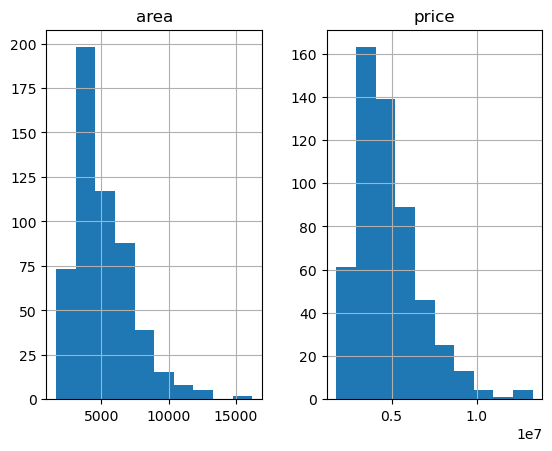

In [28]:
viz = cdf[["area","price"]]
viz.hist()
plt.show()

## رسم نمودار با دو مولفه منطقه و قیمت برای اینکه بفهمیم رابطه بینشون چطوریه

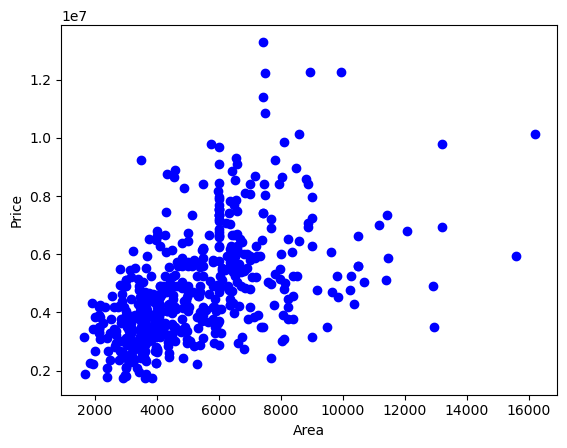

In [29]:
plt.scatter(cdf.area, cdf.price, color = "blue")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

## جدا کردن دیتای تست و تمرینی

In [41]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## رسم دوباره نمودار این بار با دیتای تمرینی

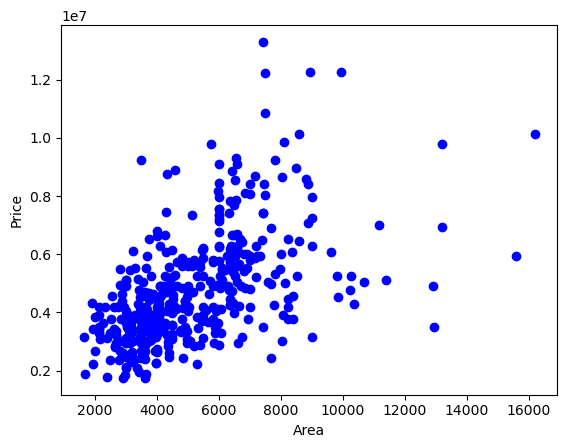

In [43]:
plt.scatter(train.area, train.price, color="blue")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

## به دست اوردن شیب خط و عرض از مبدا با توجه به نقاط 

In [75]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train["area"]).reshape(-1, 1)
train_y = np.asanyarray(train["price"])
regr.fit(train_x, train_y)
print(f"coefficient:{regr.coef_}")
print(f"intercept:{regr.intercept_}")

coefficient:[476.62154216]
intercept:2310147.2886695787


## رسم نمودار اسکتر و رسم تابع خطی فیت شده با نقاط

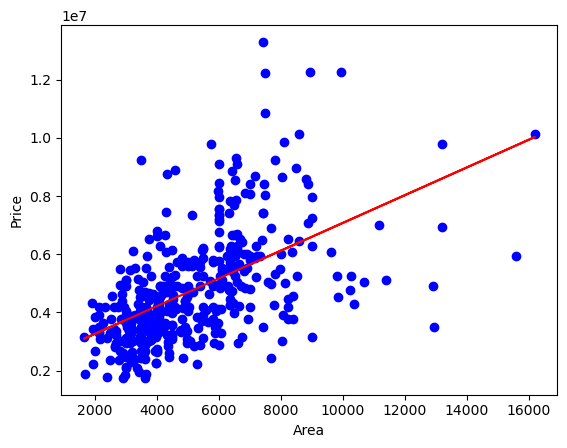

In [77]:
plt.scatter(train.area, train.price, color="blue")
plt.plot(train_x, regr.coef_[0] * train_x + regr.intercept_, color= "red")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

## ارزیابی مدل 
## مقدار اسکور بین صفر ویکه هر چی اسکور به یک نزدیک تر باشه بهتر و ارتباط بین دو مولفه معنادار تره

In [85]:
from sklearn.metrics import r2_score
test_x =  np.asanyarray(test["area"]).reshape(-1, 1)
test_y =  np.asanyarray(test["price"])
test_y_ = regr.predict(test_x)
print(f"MAE: {np.mean(np.absolute(test_y_ - test_y))}")
print(f"MSE:{np.mean(np.sum(test_y_ - test_y)**2)}")
print(f"r2:{r2_score(test_y, test_y_)}")

MAE: 1298123.7372435657
MSE:881816523371.1501
r2:0.22380886083377527
